In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("data.csv")
df_e=pd.get_dummies(df)

In [4]:
y = df.diagnosis                          # M or B 
mylist = ['Unnamed: 32','id','diagnosis']
x = df.drop(mylist,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y = y.apply(lambda x: 0 if(x=='B') else 1)

In [6]:
X = x

In [17]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
model = RandomForestClassifier(n_estimators = 340)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=340)

In [12]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ValueError: The number of FixedLocator locations (30), usually from a call to set_ticks, does not match the number of ticklabels (33).

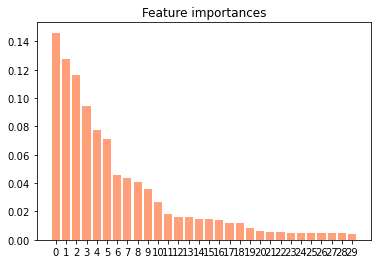

In [14]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X_train.shape[1]), df.columns, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [18]:
sfm = SelectFromModel(model, threshold=0.06)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       148
           1       0.95      0.93      0.94        80

    accuracy                           0.96       228
   macro avg       0.95      0.95      0.95       228
weighted avg       0.96      0.96      0.96       228



In [8]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
model = RandomForestClassifier(n_estimators = 340)
model.fit(X_train,y_train)
features = X.columns



scaler=StandardScaler()
X=scaler.fit_transform(X)


rfe = RFECV(model,cv=5,step=1)
selector = rfe.fit(X_train,y_train)
selector.support_

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False])

In [33]:
selected_features = features[(selector.support_)]

In [35]:
list(selected_features)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

In [18]:
selected_features = features[(selector.support_)]

In [37]:
X = x[list(selected_features)]

In [40]:
y = y

In [41]:
#after the feature selection using andomforestclassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

scaler=StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train,y_train)
yhat = neigh.predict(X_test)

print("Train set Accuracy :", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy :", metrics.accuracy_score(y_test, yhat))

Train set Accuracy : 0.9794721407624634
Test set Accuracy : 0.9736842105263158


In [42]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [43]:
precision_score(y_test, yhat)

0.9625

In [44]:
recall_score(y_test, yhat)

0.9625

In [45]:
f1_score(y_test, yhat)

0.9625000000000001